In [8]:
import zipfile
import os

# Path to the uploaded file
zip_path = 'G:\\My Drive\\Perkuliahan\\Pribadi\\Semester 5\\Pembelajaran Mesin\\Pertemuan 4\\images.zip'
extract_dir = 'G:\\My Drive\\Perkuliahan\\Pribadi\\Semester 5\\Pembelajaran Mesin\\Pertemuan 4\\gambar'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files and directories to see the content
extracted_files = os.listdir(extract_dir)
extracted_files


['images', '__MACOSX']

In [9]:
# List the files in the 'images' directory
image_folder = os.path.join(extract_dir, 'images')
image_files = os.listdir(image_folder)
image_files[:10]  # Display the first 10 files to check content


['test', 'training']

In [10]:
# List the files inside 'training' folder
training_folder = os.path.join(image_folder, 'training')
training_classes = os.listdir(training_folder)

# Display the class folders inside the 'training' folder
training_classes

['day', 'night']

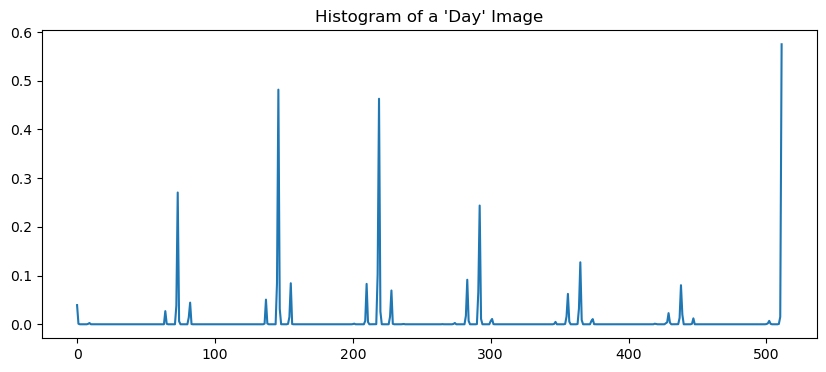

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to compute histogram for an image
def compute_histogram(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# List first few images in 'day' and 'night' classes
day_images = os.listdir(os.path.join(training_folder, 'day'))
night_images = os.listdir(os.path.join(training_folder, 'night'))

# Compute histogram for the first 'day' image
sample_day_image_path = os.path.join(training_folder, 'day', day_images[0])
sample_day_hist = compute_histogram(sample_day_image_path)

# Plot the histogram
plt.figure(figsize=(10, 4))
plt.title("Histogram of a 'Day' Image")
plt.plot(sample_day_hist)
plt.show()


In [12]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Fungsi untuk menghitung histogram
def compute_histogram(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Mendapatkan data gambar
base_dir = 'G:\\My Drive\\Perkuliahan\\Pribadi\\Semester 5\\Pembelajaran Mesin\\Pertemuan 4\\images\\images'
labels = ['day', 'night']
data = []
target = []

for label in labels:
    folder_path = os.path.join(base_dir, 'training', label)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        hist = compute_histogram(image_path)
        data.append(hist)
        target.append(label)

# Konversi ke array
data = np.array(data)
target = np.array(target)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Melatih model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         day       1.00      1.00      1.00        24
       night       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

